<a href="https://colab.research.google.com/github/karyapoormohamadie/Diabete_predictor/blob/main/diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [23]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80,0,1,4,25.19,6.6,140,0
1,2,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,2,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,2,80,0,0,0,27.32,6.2,90,0
99996,2,2,0,0,0,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,2,24,0,0,4,35.42,4.0,100,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 6.9 MB


In [5]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [10]:
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 2)

In [13]:
df['age'] = df['age'].astype('int')

In [19]:
df['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df['smoking_history'] = le.fit_transform(df['smoking_history'])

<Axes: xlabel='diabetes', ylabel='count'>

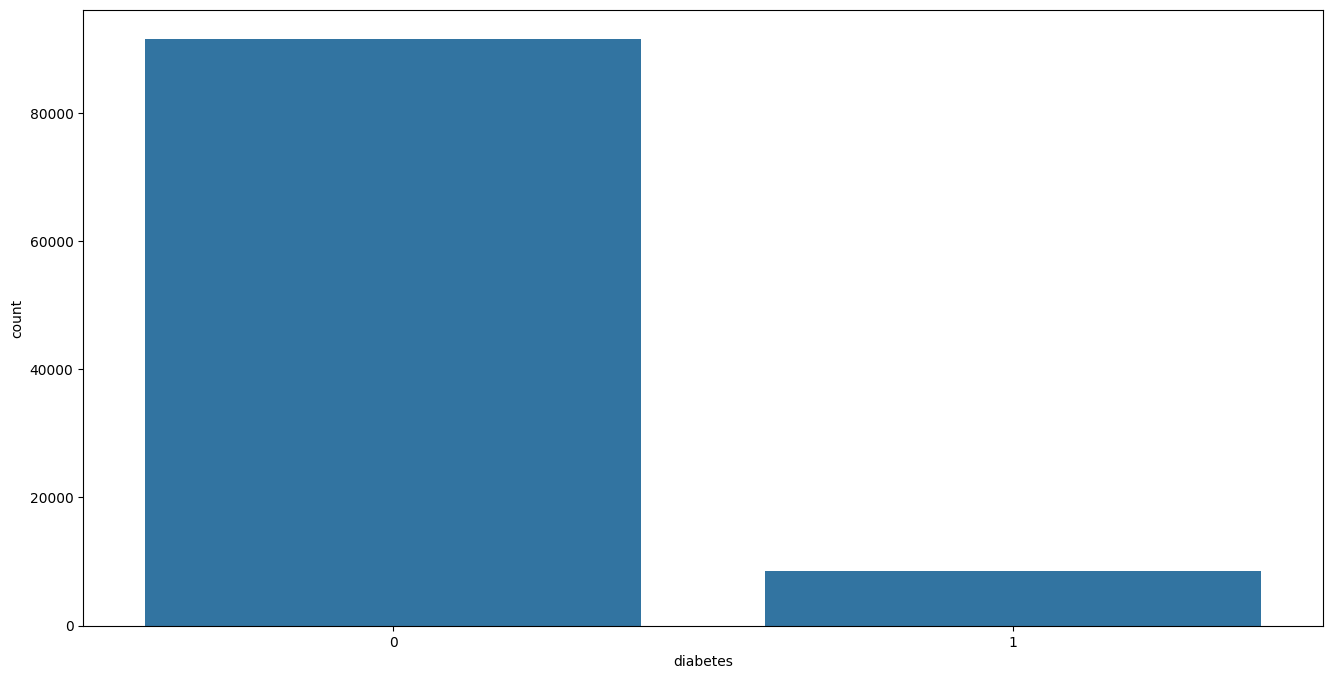

In [46]:
plt.figure(figsize=(16,8))
sns.barplot(df['diabetes'].value_counts())

<Axes: >

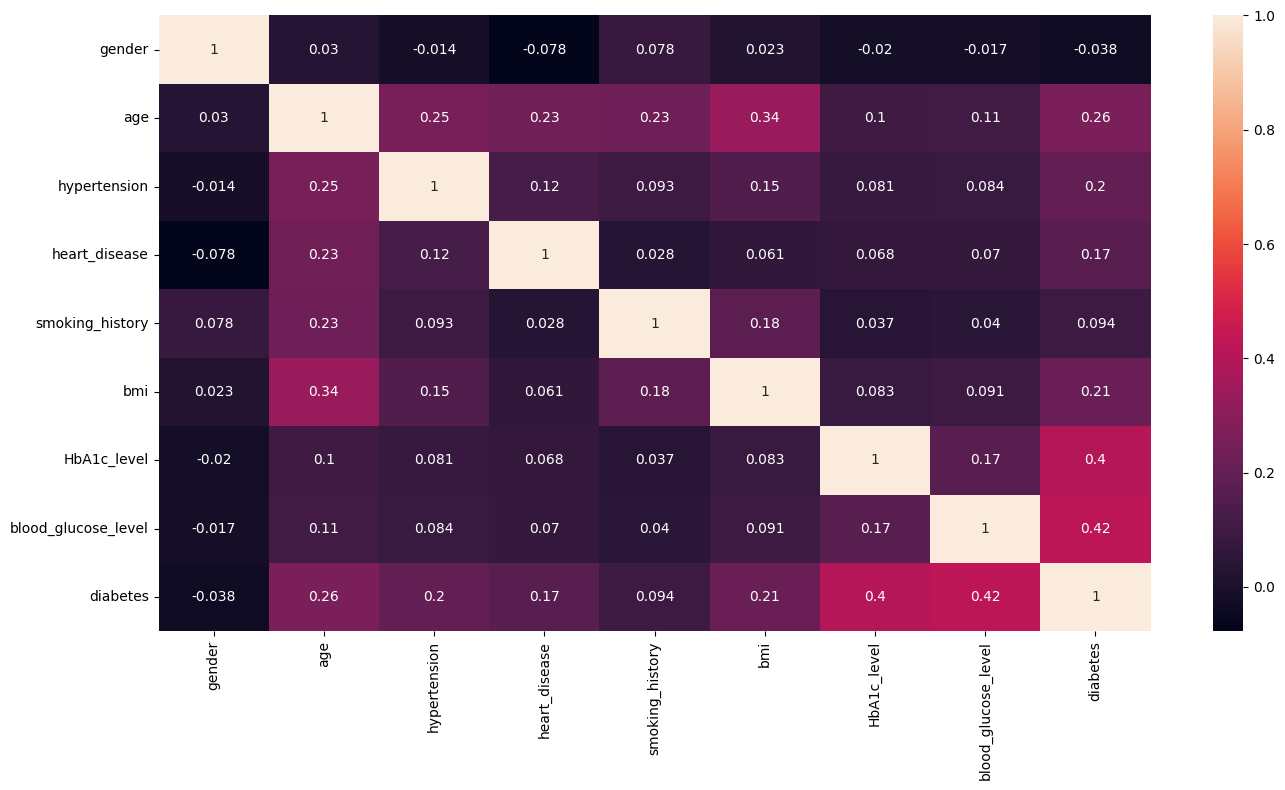

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

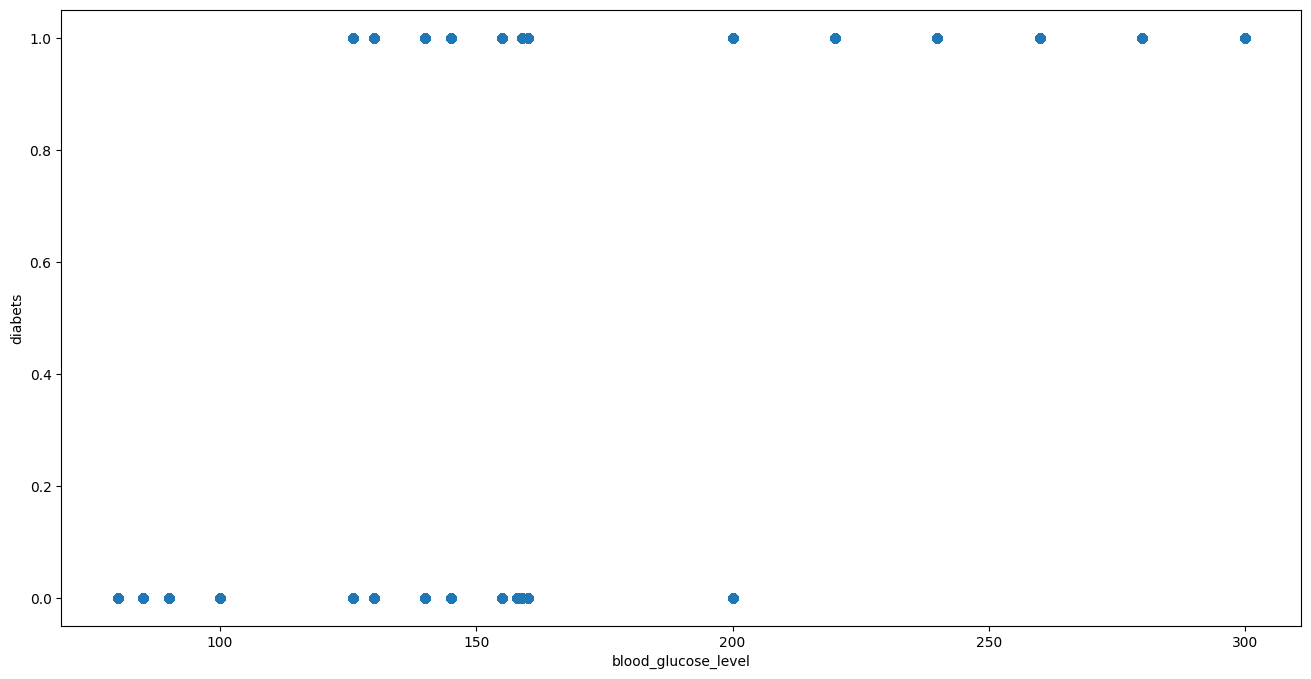

In [45]:
plt.figure(figsize=(16,8))
plt.xlabel('blood_glucose_level')
plt.ylabel('diabets')
plt.scatter(df['blood_glucose_level'],df['diabetes'])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,f1_score

In [85]:
x = df.drop('smoking_history',axis=1)
y = df['diabetes']

In [86]:
 X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.10)

In [90]:
forest = RandomForestClassifier(max_depth=8)
forest.fit(X_train,y_train)
prediction = forest.predict(X_test)


In [95]:
print('precison score is equal to =',precision_score(y_test,prediction))
print('f1 score is equal to =',f1_score(y_test,prediction))

precison score is equal to = 1.0
f1 score is equal to = 1.0
